# Exercise 2

In the previous exercise we did some data cleaning and data imputation with the data set 
agriRuralDevelopment.csv and through visualization we checked if the cleaning operation was successful.

The goal of the second exercise is to create multiple coordinated views on web pages with the resulting 
file from exercise one, where users can interactively explore the data. For this exercise we only consider 
40 countries of our choosing. 

In [5]:
# imports
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 

import string
import os

In [6]:
datapath = '../data'
fileName = 'claras_dataframe.csv'

df_ex1 = pd.read_csv(os.path.join(datapath, fileName), index_col=False)
df_ex1.head()

Unnamed: 0 Country Name Country Code  year  \
0           0  Afghanistan          AFG  1960   
1           1  Afghanistan          AFG  1961   
2           2  Afghanistan          AFG  1962   
3           3  Afghanistan          AFG  1963   
4           4  Afghanistan          AFG  1964   

   Agricultural land (% of land area)  Agricultural land (sq. km)  \
0                           57.745918                    377000.0   
1                           57.745918                    377000.0   
2                           57.837821                    377600.0   
3                           57.914407                    378100.0   
4                           58.010906                    378730.0   

   Arable land (% of land area)  Arable land (hectares per person)  \
0                     11.717673                           0.834296   
1                     11.717673                           0.834296   
2                     11.794259                           0.823403   
3                     11.870845                           0.812096   
4                     11.947431                           0.800428   

   Arable land (hectares)  Birth rate, crude (per 1,000 people)  ...  \
0               7650000.0                                51.279  ...   
1               7650000.0                                51.373  ...   
2               7700000.0                                51.457  ...   
3               7750000.0                                51.530  ...   
4               7800000.0                                51.589  ...   

   GDP per capita (current US$)  Land area (sq. km)  \
0                     59.773194            652860.0   
1                     59.860874            652860.0   
2                     58.458015            652860.0   
3                     78.706388            652860.0   
4                     82.095231            652860.0   

   Livestock production index (2004-2006 = 100)  \
0                                         43.37   
1                                         43.37   
2                                         43.99   
3                                         47.03   
4                                         48.56   

   Mortality rate, infant (per 1,000 live births)  \
0                                           232.0   
1                                           232.0   
2                                           232.0   
3                                           227.8   
4                                           223.9   

   Permanent cropland (% of land area)  Population, total  Rural population  \
0                             0.076586          8996973.0         8241137.0   
1                             0.076586          9169410.0         8373138.0   
2                             0.091903          9351441.0         8512056.0   
3                             0.091903          9543205.0         8657977.0   
4                             0.111816          9744781.0         8810646.0   

   Rural population (% of total population)  \
0                                    91.599   
1                                    91.316   
2                                    91.024   
3                                    90.724   
4                                    90.414   

   Rural population growth (annual %)  Surface area (sq. km)  
0                            1.589040               652860.0  
1                            1.589040               652860.0  
2                            1.645479               652860.0  
3                            1.699758               652860.0  
4                            1.747967               652860.0  

[5 rows x 23 columns]

<Axes: >

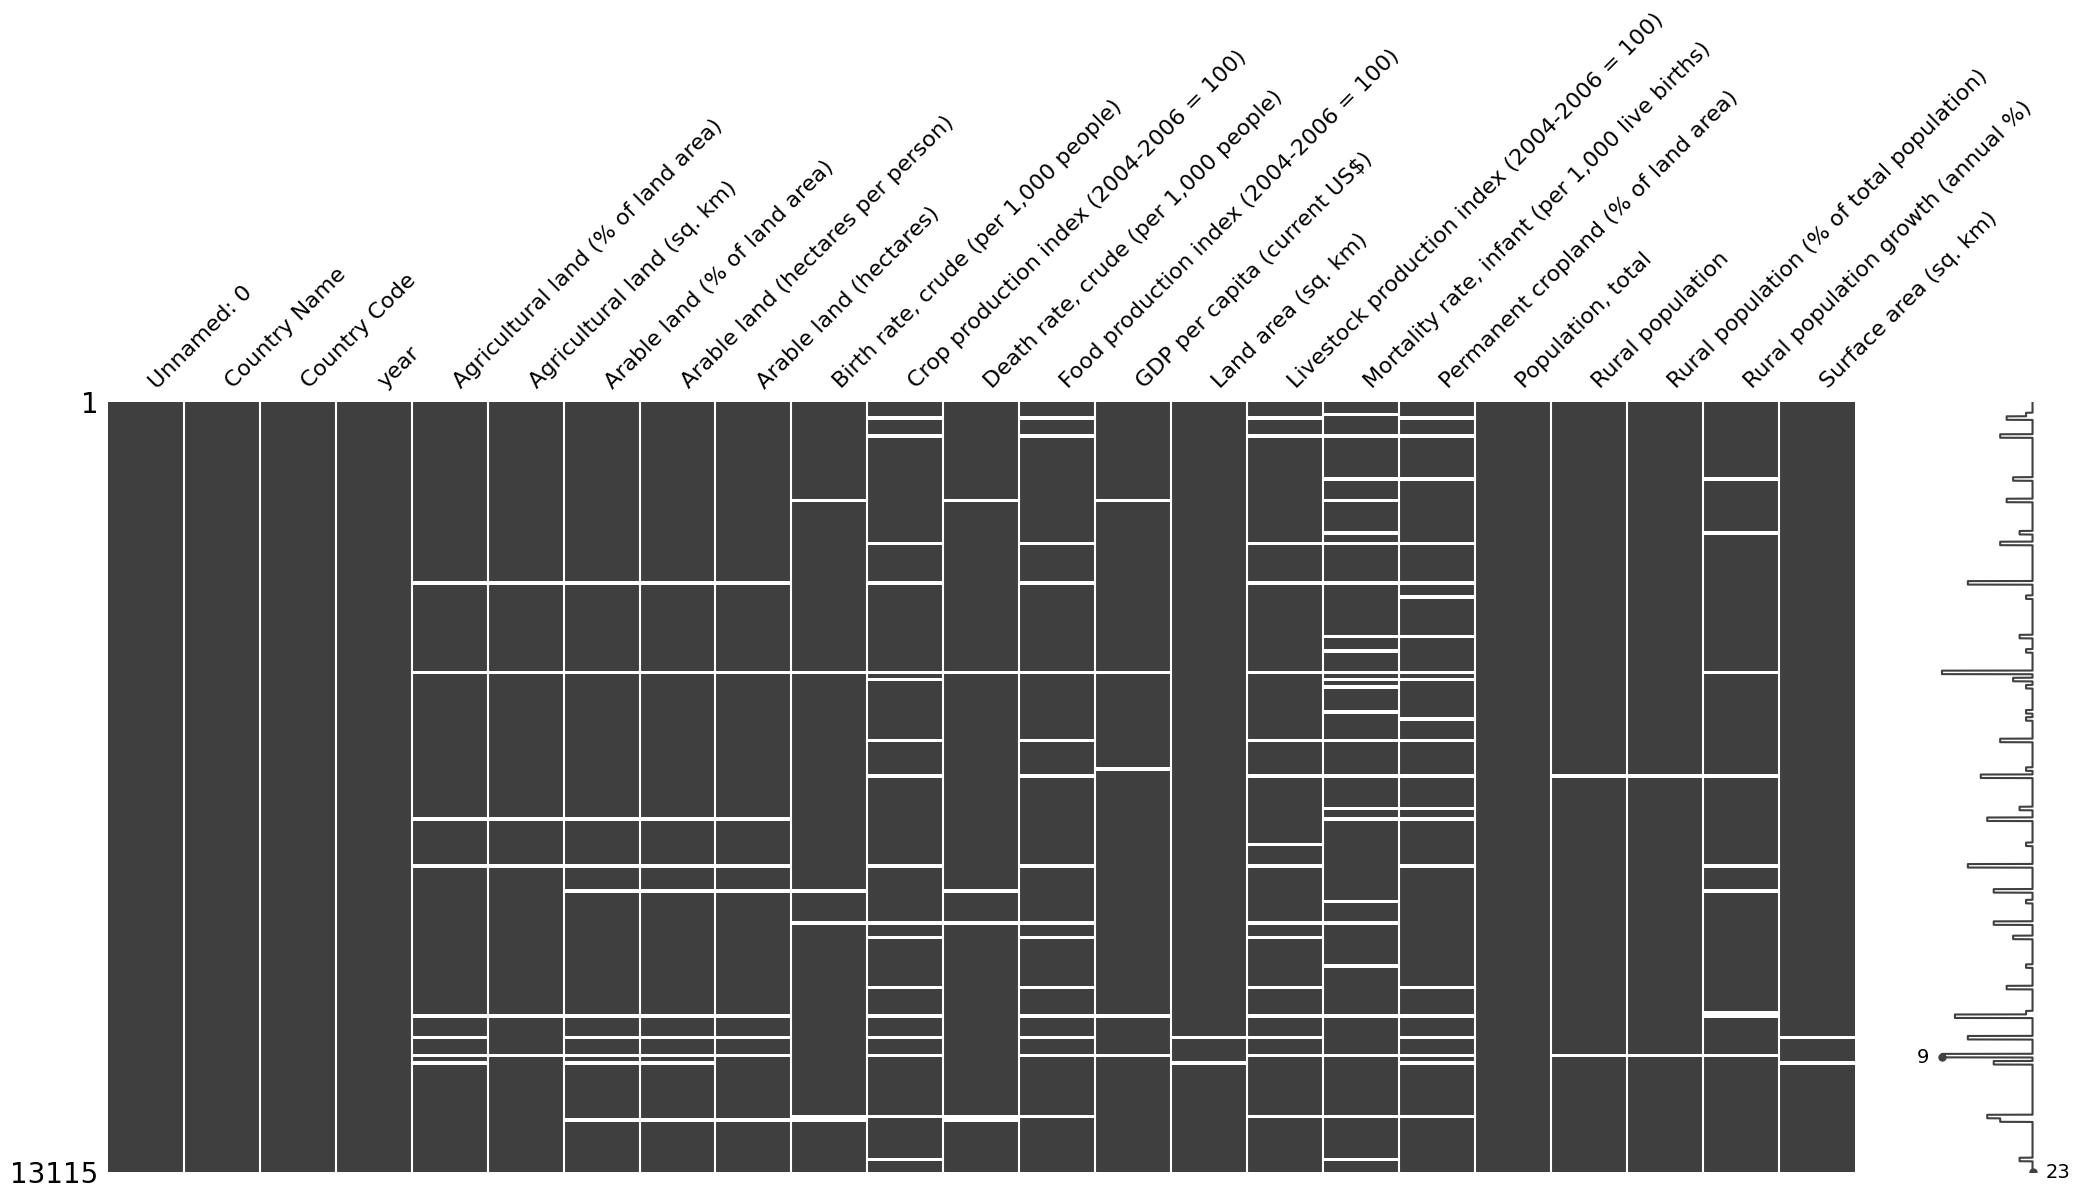

In [155]:
msno.matrix(df_ex1)

## Data Selection

We choose 40 countries of the ones in the dataframe that have no missing values at all. 

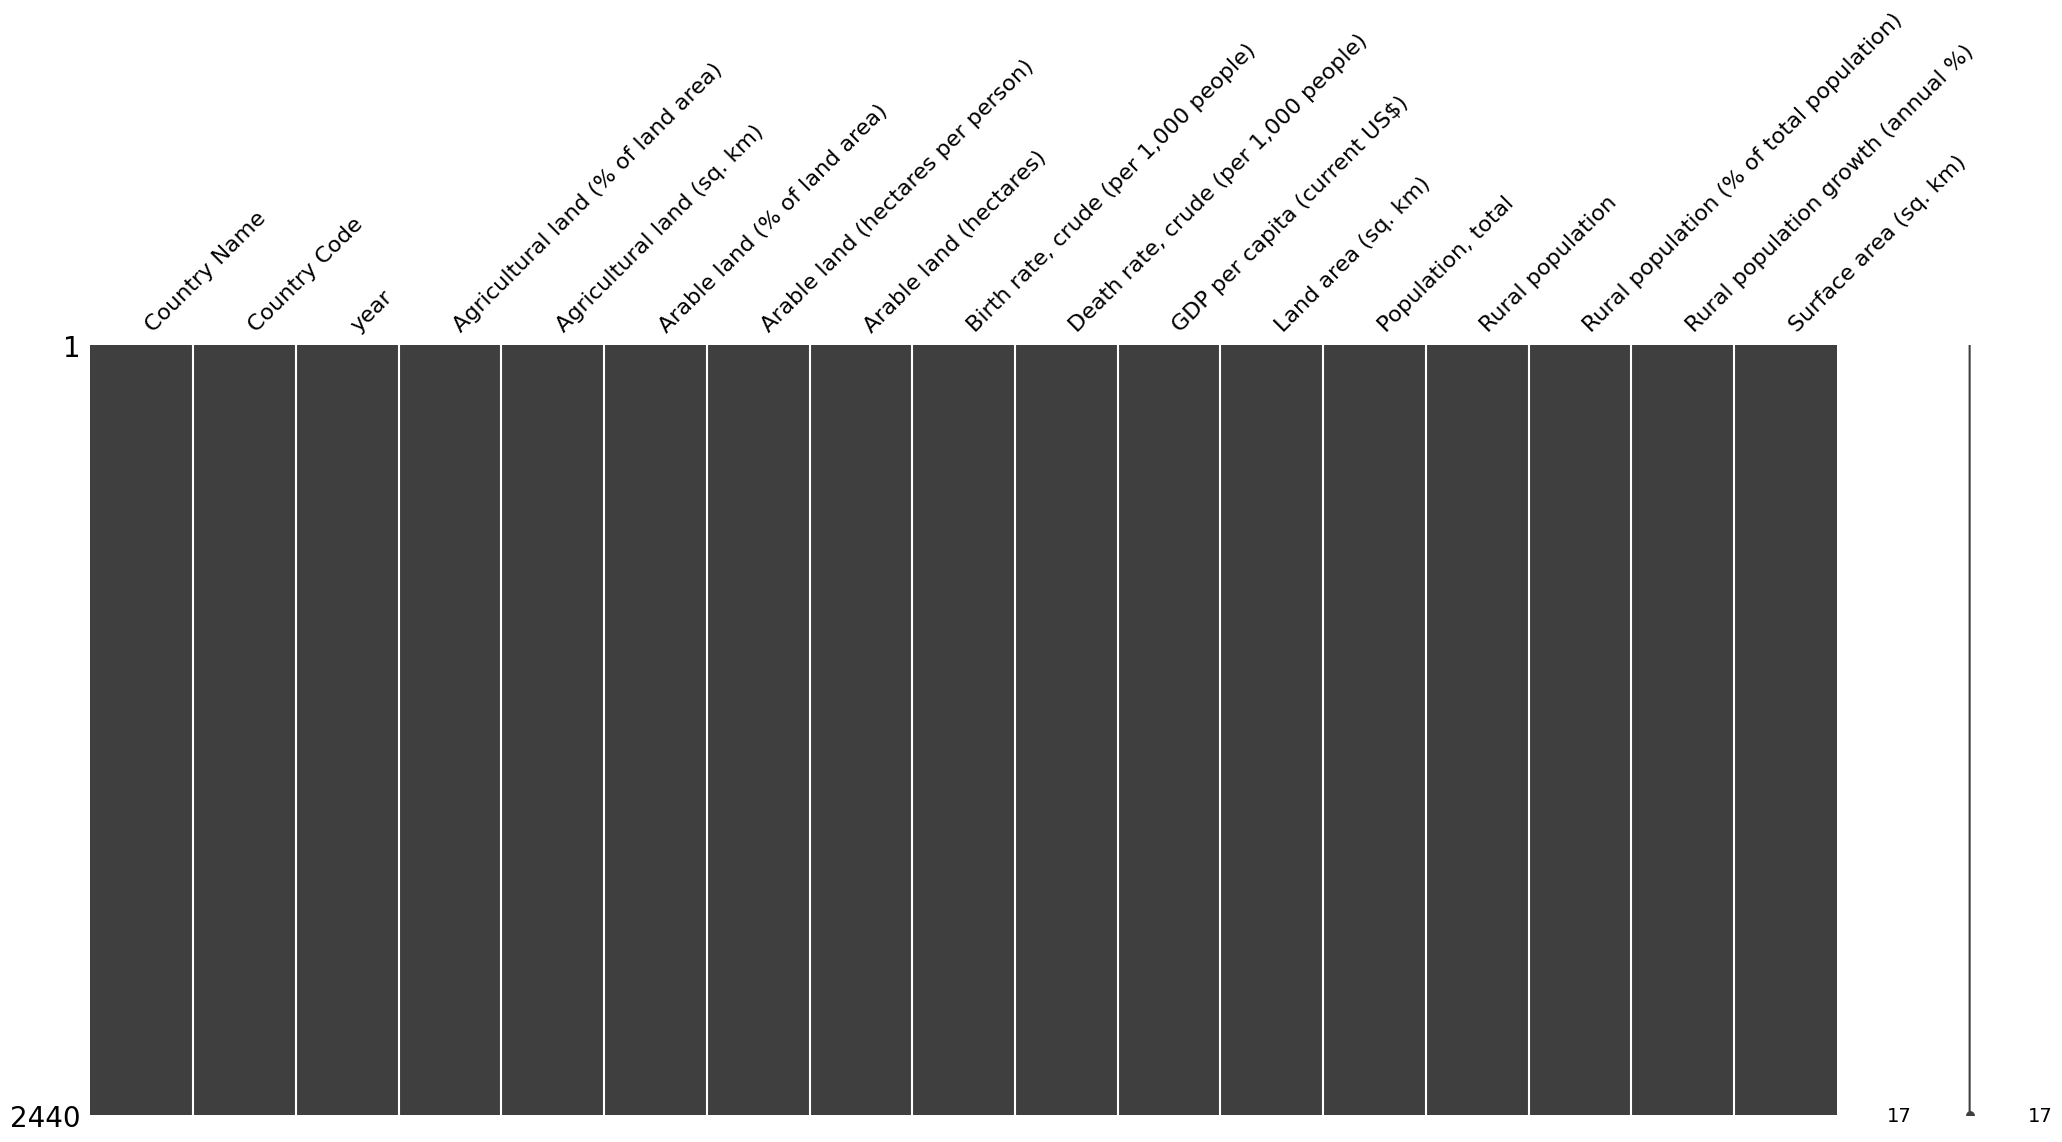

In [8]:

df_selected = df_ex1.drop(df_ex1.columns[[0, 10, 12, 15, 16, 17]], axis=1).copy()
country_names = sorted(list(set(df_selected["Country Name"])))
cn_selected = list({ cn for cn in country_names if df_selected[df_selected["Country Name"] == cn].isnull().sum().sum() == 0})[:40]

df_selected40 = df_selected.loc[df_selected['Country Name'].isin(cn_selected)]

msno.matrix(df_selected40)

df_selected40.to_csv('../data/preproc_claras_dataframe.csv')


In [150]:
len(list(set(df_selected40["Country Name"])))
sorted(list(set(df_selected40["Country Name"])))

['Argentina',
 'Bahrain',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 "Cote d'Ivoire",
 'Croatia',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Estonia',
 'Fiji',
 'French Polynesia',
 'Greece',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Kiribati',
 'Lao PDR',
 'Latvia',
 'Liechtenstein',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Niger',
 'Panama',
 'Peru',
 'Poland',
 'Saudi Arabia',
 'Spain',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Tonga',
 'Uganda',
 'Vanuatu',
 'Zimbabwe']

## PCA - Principle Component Analysis

PCA, or Principal component analysis, is the main linear algorithm for dimension reduction often used in unsupervised learning.
This algorithm identifies and discards features that are less useful to make a valid approximation on a dataset.

By reducing the number of features, PCA can help:
- Reduce the risk of overfitting a model to noisy features.
- Speed-up the training of a machine learning algorithm
- Make simpler data vizualisations.

In [273]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

def PrComAnalysis(df, string):
    df_2020 = df[df["year"] == 2020].copy()

    # distributing the dataset into two components X and Y
    tmp = list(df_2020.columns)
    tmp.remove(string)
    tmp.remove('Country Name')
    tmp.remove('Country Code')
    tmp.remove('year') 

    # distributing the dataset into two components X and y
    # We decided to do the regression on Agricultural land (% of land area)
    X = df_2020[tmp].values 
    y =  df_2020.loc[:,[string]].values

    # fitting the Standard scale
    X_scaled = preprocessing.scale(X)

    # Create a PCA object and fit it to the data
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_scaled)

    df_PCA = pd.DataFrame(data = principalComponents, index = df_2020['Country Code'].values
                          , columns = ['PC1', 'PC2'])
    
    return df_PCA



PrComAnalysis(df_selected40, 'Agricultural land (% of land area)')
PrComAnalysis(df_selected40, "Rural population")

PC1       PC2
ARG  9.371433  1.890826
BHR -1.495949 -0.739280
BRN -1.775014  0.817782
BGR -0.272300  3.074447
BFA  0.483323 -1.973698
BDI -0.389320 -2.831613
CPV -1.444227  0.263308
KHM -0.327541 -1.040982
CMR  0.664940 -0.927072
CIV  0.573401 -1.409566
HRV -1.232305  1.980157
DJI -0.951566 -0.238114
DOM -0.794073  1.550953
ECU -0.538831 -0.526551
EST -0.927926  1.888398
FJI -1.343944  0.400112
PYF -1.723930  0.206008
GRC -0.549314  2.383954
GIN  0.168250 -1.961054
GNB -0.882035 -1.468040
GUY -0.901976 -0.196034
KIR -1.377217 -0.539338
LAO -0.873006 -0.644155
LVA -0.648628  2.607248
LIE -2.091246  0.899420
MDA -0.182113  2.023167
MNE -1.704188  1.521246
MAR  1.614406 -0.009830
NER  3.626134 -2.889748
PAN -1.047273 -0.009099
PER  1.862181  0.109771
POL  1.169745  1.226970
SAU  5.617573  0.209703
ESP  1.971810  1.788933
LKA -0.734467 -0.733796
VCT -1.616147  0.804340
TON -1.222387 -1.191543
UGA  1.231763 -2.854130
VUT -1.598899 -2.089171
ZWE  0.290862 -1.373931

In [12]:
df_selected40.columns.values

print("""'Country Name', 'Country Code', 'year',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Arable land (% of land area)',
       'Arable land (hectares per person)', 'Arable land (hectares)',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'GDP per capita (current US$)', 'Land area (sq. km)',
       'Population, total', 'Rural population',
       'Rural population (% of total population)', 'Rural population growth (annual %)', 'Surface area (sq. km)'""".replace('  ', '').replace('\n', ''))

'Country Name', 'Country Code', 'year', 'Agricultural land (% of land area)', 'Agricultural land (sq. km)', 'Arable land (% of land area)', 'Arable land (hectares per person)', 'Arable land (hectares)', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)', 'GDP per capita (current US$)', 'Land area (sq. km)', 'Population, total', 'Rural population', 'Rural population (% of total population)', 'Rural population growth (annual %)', 'Surface area (sq. km)'


In [14]:
set(df_selected40['Country Code'])

{'AFG',
 'ATG',
 'AUT',
 'AZE',
 'BEL',
 'BGR',
 'BHR',
 'BRN',
 'CAF',
 'CHN',
 'CIV',
 'COD',
 'COG',
 'CUB',
 'DMA',
 'DZA',
 'ECU',
 'ESP',
 'GIN',
 'GTM',
 'HND',
 'HRV',
 'JAM',
 'KAZ',
 'KNA',
 'LAO',
 'LBR',
 'LBY',
 'LSO',
 'LTU',
 'MDG',
 'MLT',
 'MNE',
 'MYS',
 'NOR',
 'THA',
 'UKR',
 'URY',
 'YEM',
 'ZMB'}

## Time Series

In [269]:
def timeSeries(df, country, attr):
    df_tmp = df[df["Country Name"]== country][["year", attr]].copy()
    return df_tmp.reset_index(drop=True)



timeSeries(df_selected40, "Burundi", "Rural population").plot(x="year", y="Rural population")
    

<Axes: xlabel='year'>

In [266]:
df_selected40[df_selected40["Country Name"]=='Burundi'][["year","Rural population"]].reset_index(drop=True).head()

year  Rural population
0  1960         2739819.0
1  1961         2792109.0
2  1962         2844697.0
3  1963         2899417.0
4  1964         2958713.0

## Data Imputation

As mentioned in the feedback of exercise 1, it is not recommended to use for every attribute the same data imputation method. The matrix above shows us that we are still missing some values in all columns except for five. The first column are just indizies which we can clearly drop without consequences. 

For the columns Surface area (sq. km), Land area (sq. km),  Agricultural land (sq. km), Arable land (hectares), Rural population we will use the closest value method.
For columns like Agricultural land (% of land area), Arable land (% of land area), Arable land (hectares per person), Rural population (% of total population) we can calculate the values with two other columns.
Mortality rate, infant (per 1,000 live births), Birth rate, crude (per 1,000 people) ... etc maybe just mode /most frequent


In [ ]:
df_ex1.head()
df_ex1.isnull().sum()
df_ex1.isnull().mean()*100

In [161]:
df_imputed = df_ex1.drop(df_ex1.columns[0], axis=1).copy()               # [0, 10, 12, 15, 16, 17]
country_names = sorted(list(set(df_imputed["Country Name"])))

mode_imputer = SimpleImputer(strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=4)

colm_closestval = {"Surface area (sq. km)", 
                   "Agricultural land (sq. km)", 
                   "Arable land (hectares)", 
                   "Rural population" }

colm_mode =  {"Mortality rate, infant (per 1,000 live births)", 
              "Death rate, crude (per 1,000 people)",  
              "Birth rate, crude (per 1,000 people)"}

groups = [df_imputed[df_imputed["Country Name"] == cn] for cn in country_names]

# apply imputation to each column for each group
imputed_groups = []
for group in groups:
    imputed_group = pd.DataFrame()
    for col in group.columns:
        if col in colm_closestval:
            imputer = knn_imputer 
        elif col in colm_mode:
            imputer = mode_imputer
        else:
            continue
        imputed_col = imputer.fit_transform(group[[col]])
        #imputed_group[col] = imputed_col.flatten()
        group.iloc[:, group.columns.get_loc(col)] = imputed_col.flatten()
    imputed_groups.append(imputed_group)

# combine imputed groups into a single DataFrame
imputed_df = pd.concat(imputed_groups)

/var/folders/k8/k2brnsnj5jj9l2034hkmzgqw0000gn/T/ipykernel_27719/1029812888.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.iloc[:, group.columns.get_loc(col)] = imputed_col.flatten()
/var/folders/k8/k2brnsnj5jj9l2034hkmzgqw0000gn/T/ipykernel_27719/1029812888.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.iloc[:, group.columns.get_loc(col)] = imputed_col.flatten()
/var/folders/k8/k2brnsnj5jj9l2034hkmzgqw0000gn/T/ipykernel_27719/1029812888.py:31: SettingWithCopyWarning: 
A value is try

ValueError: Must have equal len keys and value when setting with an iterable

<Axes: >

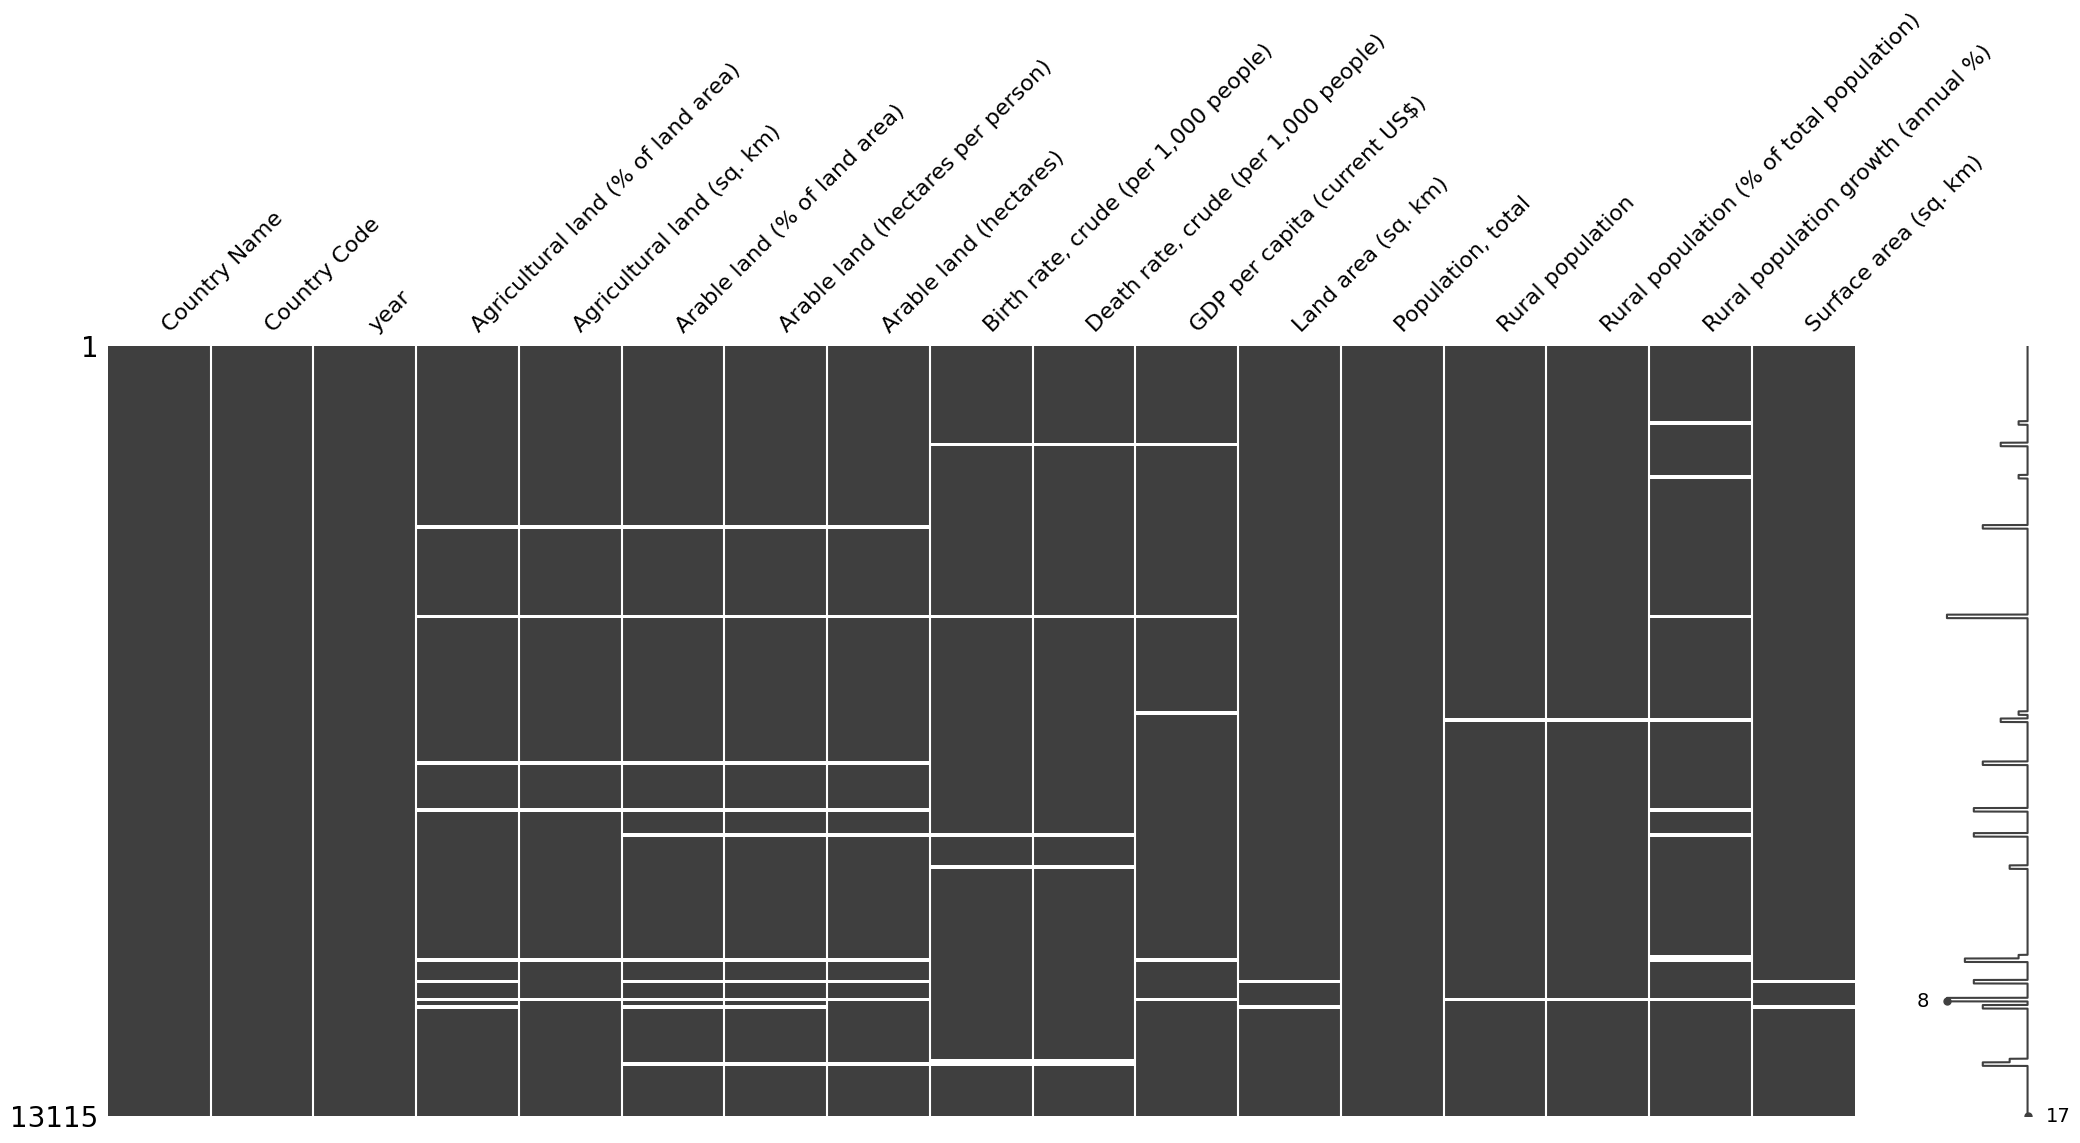

In [33]:
msno.matrix(df_imputed)